In [ ]:
## Importar Bibliotecas

import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#conectar ao Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Diego Pereira de Oliveira
# Link do inep sobre dados das escolas: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem-por-escola
# Esse é um Microdados do Exame Nacional do Ensino Médio por Escola dos anos de 2005 a 2015, sendo que foi escolhido os dados referentes aos Docentes.
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DB/aa.csv", engine='python',sep=';') -- Ignora esse banco --
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DB/SUP_DOCENTE_2019.CSV", engine='python',sep='|')

In [ ]:
df

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_DOCENTE_IES,ID_DOCENTE,TP_SITUACAO,TP_ESCOLARIDADE,TP_REGIME_TRABALHO,TP_SEXO,NU_ANO_NASCIMENTO,NU_MES_NASCIMENTO,NU_DIA_NASCIMENTO,NU_IDADE,TP_COR_RACA,CO_PAIS_ORIGEM,TP_NACIONALIDADE,CO_UF_NASCIMENTO,CO_MUNICIPIO_NASCIMENTO,IN_DEFICIENCIA,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_INTELECTUAL,IN_ATUACAO_EAD,IN_ATUACAO_EXTENSAO,IN_ATUACAO_GESTAO,IN_ATUACAO_GRAD_PRESENCIAL,IN_ATUACAO_POS_EAD,IN_ATUACAO_POS_PRESENCIAL,IN_ATUACAO_SEQUENCIAL,IN_ATUACAO_PESQUISA,IN_BOLSA_PESQUISA,IN_SUBSTITUTO,IN_EXERCICIO_DATA_REFERENCIA,IN_VISITANTE,TP_VISITANTE_IFES_VINCULO
0,2019,1,1,1,1178692,EC5AA8E675AD29C50386820A3F3E9F97,1,5,1.0,2,1952,2,26,67,3,76,1,51.0,5103403.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,NaN
1,2019,1,1,1,1178691,DDA849C5C6275470F9175628F502218E,1,4,1.0,2,1969,3,11,50,3,76,1,51.0,5103403.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
2,2019,1,1,1,1178693,2FF35722D03A9C6459FB5470F17F6709,1,3,1.0,2,1955,6,16,64,4,76,1,51.0,5103403.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
3,2019,1,1,1,1180431,C5AB8500E4EC686BFFF71870108EA10A,1,5,1.0,2,1965,8,29,54,1,76,1,51.0,5103403.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN
4,2019,1,1,1,1178686,60FD7BF0222B1B16D19D9E4E08D4178A,1,5,1.0,2,1957,5,27,62,1,76,1,51.0,5103403.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399423,2019,24672,2,3,735565,5C88FFC5B4004508FE30AB9EC778F0EC,1,4,4.0,2,1979,12,13,40,1,76,1,35.0,3529302.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN
399424,2019,24672,2,3,735555,DA713FD77BC89C90A1DF01529F6DCEA1,1,4,4.0,1,1978,4,21,41,1,76,1,35.0,3550308.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN
399425,2019,24672,2,3,735482,792D01A8C0F3BE2C0A2381A46F278C46,1,4,4.0,2,1966,1,16,53,1,76,1,35.0,3502804.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN
399426,2019,24672,2,3,735621,0D2271F0EBAF360F3E0A4ED29431AE09,1,4,4.0,2,1979,7,29,40,1,76,1,35.0,3503208.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN


In [ ]:
df.columns.values

array(['NU_ANO_CENSO', 'CO_IES', 'TP_CATEGORIA_ADMINISTRATIVA',
       'TP_ORGANIZACAO_ACADEMICA', 'CO_DOCENTE_IES', 'ID_DOCENTE',
       'TP_SITUACAO', 'TP_ESCOLARIDADE', 'TP_REGIME_TRABALHO', 'TP_SEXO',
       'NU_ANO_NASCIMENTO', 'NU_MES_NASCIMENTO', 'NU_DIA_NASCIMENTO',
       'NU_IDADE', 'TP_COR_RACA', 'CO_PAIS_ORIGEM', 'TP_NACIONALIDADE',
       'CO_UF_NASCIMENTO', 'CO_MUNICIPIO_NASCIMENTO', 'IN_DEFICIENCIA',
       'IN_DEFICIENCIA_CEGUEIRA', 'IN_DEFICIENCIA_BAIXA_VISAO',
       'IN_DEFICIENCIA_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_SURDOCEGUEIRA',
       'IN_DEFICIENCIA_MULTIPLA', 'IN_DEFICIENCIA_INTELECTUAL',
       'IN_ATUACAO_EAD', 'IN_ATUACAO_EXTENSAO', 'IN_ATUACAO_GESTAO',
       'IN_ATUACAO_GRAD_PRESENCIAL', 'IN_ATUACAO_POS_EAD',
       'IN_ATUACAO_POS_PRESENCIAL', 'IN_ATUACAO_SEQUENCIAL',
       'IN_ATUACAO_PESQUISA', 'IN_BOLSA_PESQUISA', 'IN_SUBSTITUTO',
       'IN_EXERCICIO_DATA_REFERENCIA', 'IN_VISITANTE',
       'TP_VISITAN

## 2 - Selecionar Dados

In [ ]:
#crie um novo array com as colunas que você deseja
colunas_selecionadas = ['CO_IES', 'TP_CATEGORIA_ADMINISTRATIVA',
       'TP_ORGANIZACAO_ACADEMICA',
       'TP_SITUACAO', 'TP_ESCOLARIDADE', 'TP_REGIME_TRABALHO', 'TP_SEXO',
       'NU_ANO_NASCIMENTO', 'NU_MES_NASCIMENTO', 'NU_DIA_NASCIMENTO',
       'NU_IDADE', 'TP_COR_RACA', 'CO_PAIS_ORIGEM', 'TP_NACIONALIDADE',
       'CO_UF_NASCIMENTO', 'CO_MUNICIPIO_NASCIMENTO', 'IN_DEFICIENCIA'
       'IN_ATUACAO_EAD', 'IN_BOLSA_PESQUISA', 'IN_SUBSTITUTO']
      
novo_df = df.filter(items=colunas_selecionadas)

In [ ]:
novo_df

,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,TP_SITUACAO,TP_ESCOLARIDADE,TP_REGIME_TRABALHO,TP_SEXO,NU_ANO_NASCIMENTO,NU_MES_NASCIMENTO,NU_DIA_NASCIMENTO,NU_IDADE,TP_COR_RACA,CO_PAIS_ORIGEM,TP_NACIONALIDADE,CO_UF_NASCIMENTO,CO_MUNICIPIO_NASCIMENTO,IN_BOLSA_PESQUISA,IN_SUBSTITUTO
0,1,1,1,1,5,1.0,2,1952,2,26,67,3,76,1,51.0,5103403.0,1.0,0.0
1,1,1,1,1,4,1.0,2,1969,3,11,50,3,76,1,51.0,5103403.0,0.0,0.0
2,1,1,1,1,3,1.0,2,1955,6,16,64,4,76,1,51.0,5103403.0,0.0,0.0
3,1,1,1,1,5,1.0,2,1965,8,29,54,1,76,1,51.0,5103403.0,NaN,0.0
4,1,1,1,1,5,1.0,2,1957,5,27,62,1,76,1,51.0,5103403.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399423,24672,2,3,1,4,4.0,2,1979,12,13,40,1,76,1,35.0,3529302.0,NaN,0.0
399424,24672,2,3,1,4,4.0,1,1978,4,21,41,1,76,1,35.0,3550308.0,NaN,0.0
399425,24672,2,3,1,4,4.0,2,1966,1,16,53,1,76,1,35.0,3502804.0,NaN,0.0
399426,24672,2,3,1,4,4.0,2,1979,7,29,40,1,76,1,35.0,3503208.0,NaN,0.0


In [ ]:
novo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399428 entries, 0 to 399427
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CO_IES                       399428 non-null  int64  
 1   TP_CATEGORIA_ADMINISTRATIVA  399428 non-null  int64  
 2   TP_ORGANIZACAO_ACADEMICA     399428 non-null  int64  
 3   TP_SITUACAO                  399428 non-null  int64  
 4   TP_ESCOLARIDADE              399428 non-null  int64  
 5   TP_REGIME_TRABALHO           386073 non-null  float64
 6   TP_SEXO                      399428 non-null  int64  
 7   NU_ANO_NASCIMENTO            399428 non-null  int64  
 8   NU_MES_NASCIMENTO            399428 non-null  int64  
 9   NU_DIA_NASCIMENTO            399428 non-null  int64  
 10  NU_IDADE                     399428 non-null  int64  
 11  TP_COR_RACA                  399428 non-null  int64  
 12  CO_PAIS_ORIGEM               399428 non-null  int64  
 13 

In [ ]:
novo_df['CO_MUNICIPIO_NASCIMENTO'].value_counts()

3550308.0    24087
3304557.0    21583
2611606.0     7708
3106200.0     7695
2927408.0     6695
             ...  
5209606.0        1
2507903.0        1
1503457.0        1
5213756.0        1
3505351.0        1
Name: CO_MUNICIPIO_NASCIMENTO, Length: 4357, dtype: int64

In [ ]:
novo_df['CO_UF_NASCIMENTO'].value_counts()

35.0    68944
31.0    32003
33.0    29006
43.0    23628
41.0    22503
29.0    14773
26.0    13216
42.0    11452
23.0    10740
52.0     8527
15.0     8262
25.0     6943
21.0     6216
51.0     5679
32.0     5570
22.0     4468
27.0     4341
53.0     3333
50.0     2993
24.0     2954
28.0     2554
13.0     1995
11.0     1048
16.0     1044
17.0      837
12.0      487
14.0      269
Name: CO_UF_NASCIMENTO, dtype: int64

In [ ]:
novo_df['IN_BOLSA_PESQUISA'].fillna(0.0,inplace=True)
novo_df['IN_SUBSTITUTO'].fillna(0.0,inplace=True)
novo_df['CO_MUNICIPIO_NASCIMENTO'].fillna(3550308.0,inplace=True)
novo_df['CO_UF_NASCIMENTO'].fillna(68944,inplace=True)
novo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399428 entries, 0 to 399427
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CO_IES                       399428 non-null  int64  
 1   TP_CATEGORIA_ADMINISTRATIVA  399428 non-null  int64  
 2   TP_ORGANIZACAO_ACADEMICA     399428 non-null  int64  
 3   TP_SITUACAO                  399428 non-null  int64  
 4   TP_ESCOLARIDADE              399428 non-null  int64  
 5   TP_REGIME_TRABALHO           386073 non-null  float64
 6   TP_SEXO                      399428 non-null  int64  
 7   NU_ANO_NASCIMENTO            399428 non-null  int64  
 8   NU_MES_NASCIMENTO            399428 non-null  int64  
 9   NU_DIA_NASCIMENTO            399428 non-null  int64  
 10  NU_IDADE                     399428 non-null  int64  
 11  TP_COR_RACA                  399428 non-null  int64  
 12  CO_PAIS_ORIGEM               399428 non-null  int64  
 13 

In [ ]:
df = novo_df

## 3 - Medidas de Centralidade

In [ ]:
df

,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,TP_SITUACAO,TP_ESCOLARIDADE,TP_REGIME_TRABALHO,TP_SEXO,NU_ANO_NASCIMENTO,NU_MES_NASCIMENTO,NU_DIA_NASCIMENTO,NU_IDADE,TP_COR_RACA,CO_PAIS_ORIGEM,TP_NACIONALIDADE,CO_UF_NASCIMENTO,CO_MUNICIPIO_NASCIMENTO,IN_BOLSA_PESQUISA,IN_SUBSTITUTO
0,1,1,1,1,5,1.0,2,1952,2,26,67,3,76,1,51.0,5103403.0,1.0,0.0
1,1,1,1,1,4,1.0,2,1969,3,11,50,3,76,1,51.0,5103403.0,0.0,0.0
2,1,1,1,1,3,1.0,2,1955,6,16,64,4,76,1,51.0,5103403.0,0.0,0.0
3,1,1,1,1,5,1.0,2,1965,8,29,54,1,76,1,51.0,5103403.0,0.0,0.0
4,1,1,1,1,5,1.0,2,1957,5,27,62,1,76,1,51.0,5103403.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399423,24672,2,3,1,4,4.0,2,1979,12,13,40,1,76,1,35.0,3529302.0,0.0,0.0
399424,24672,2,3,1,4,4.0,1,1978,4,21,41,1,76,1,35.0,3550308.0,0.0,0.0
399425,24672,2,3,1,4,4.0,2,1966,1,16,53,1,76,1,35.0,3502804.0,0.0,0.0
399426,24672,2,3,1,4,4.0,2,1979,7,29,40,1,76,1,35.0,3503208.0,0.0,0.0


In [ ]:
df.describe()

,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,TP_SITUACAO,TP_ESCOLARIDADE,TP_REGIME_TRABALHO,TP_SEXO,NU_ANO_NASCIMENTO,NU_MES_NASCIMENTO,NU_DIA_NASCIMENTO,NU_IDADE,TP_COR_RACA,CO_PAIS_ORIGEM,TP_NACIONALIDADE,CO_UF_NASCIMENTO,CO_MUNICIPIO_NASCIMENTO,IN_BOLSA_PESQUISA,IN_SUBSTITUTO
count,399428.000000,399428.000000,399428.000000,399428.000000,399428.000000,386073.000000,399428.000000,399428.000000,399428.000000,399428.000000,399428.000000,399428.000000,399428.000000,399428.000000,399428.000000,3.994280e+05,399428.000000,399428.000000
mean,2320.429785,3.041857,1.856612,1.076424,4.280571,2.299664,1.532296,1974.141933,6.482400,15.678918,44.858067,1.052650,79.562910,1.026611,18259.494870,3.431211e+06,0.045165,0.046965
std,4247.329425,1.668915,1.027402,0.449341,0.756229,1.101170,0.498956,10.938593,3.420489,8.781505,10.938593,1.005296,43.903799,0.219931,30393.542398,7.334520e+05,0.207665,0.211563
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1918.000000,1.000000,1.000000,20.000000,0.000000,4.000000,1.000000,11.000000,1.100015e+06,0.000000,0.000000
25%,409.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1966.000000,4.000000,8.000000,36.000000,0.000000,76.000000,1.000000,31.000000,3.137502e+06,0.000000,0.000000
50%,621.000000,4.000000,1.000000,1.000000,4.000000,2.000000,2.000000,1976.000000,6.000000,16.000000,43.000000,1.000000,76.000000,1.000000,35.000000,3.550308e+06,0.000000,0.000000
75%,1988.000000,5.000000,3.000000,1.000000,5.000000,3.000000,2.000000,1983.000000,9.000000,23.000000,53.000000,1.000000,76.000000,1.000000,68944.000000,3.550308e+06,0.000000,0.000000
max,24672.000000,7.000000,5.000000,5.000000,5.000000,4.000000,2.000000,1999.000000,12.000000,31.000000,101.000000,5.000000,999.000000,3.000000,68944.000000,5.300108e+06,1.000000,1.000000


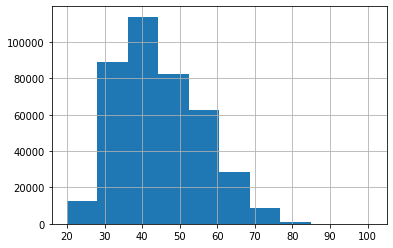

In [ ]:
df['NU_IDADE'].hist()

In [ ]:
df['NU_IDADE'].mode()

0    38
dtype: int64

In [ ]:
df['NU_IDADE'].describe()

count    399428.000000
mean         44.858067
std          10.938593
min          20.000000
25%          36.000000
50%          43.000000
75%          53.000000
max         101.000000
Name: NU_IDADE, dtype: float64

In [ ]:
p1 = df.filter(items=['NU_IDADE','TP_SEXO'])
p1.groupby('TP_SEXO').mean()

,NU_IDADE
TP_SEXO,
1,43.953060
2,45.653254


In [ ]:
p1.groupby('TP_SEXO').median()

,NU_IDADE
TP_SEXO,
1,42.0
2,44.0


In [ ]:
## 1 - Existem mais docentes do sexo feminino do que do sexo masculino.
## 2 - A faixa de idade predominatente é entre 30 a 50 anos, tendo um pico nos 40 anos.
## 3 - A idade mais presente é 38 anos, sendo que a média é de 43 para homens e 45 para mulheres, uma vez que a mediana é de 42 para homens e 44 para mulheres.
p1.groupby('TP_SEXO').count()

,NU_IDADE
TP_SEXO,
1,186814
2,212614


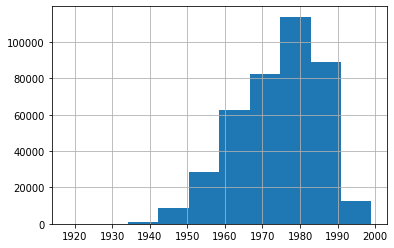

In [ ]:
df['NU_ANO_NASCIMENTO'].hist()

In [ ]:
## 4 - O ano de nascimento mais presente é o de 1981;
## 5 - O ano de nascimento mais recente é o 1999;
## 6 - O ano de nascimento mais antigo é o 1918;
df['NU_ANO_NASCIMENTO'].mode()

0    1981
dtype: int64

In [ ]:
df['NU_ANO_NASCIMENTO'].describe()

count    399428.000000
mean       1974.141933
std          10.938593
min        1918.000000
25%        1966.000000
50%        1976.000000
75%        1983.000000
max        1999.000000
Name: NU_ANO_NASCIMENTO, dtype: float64

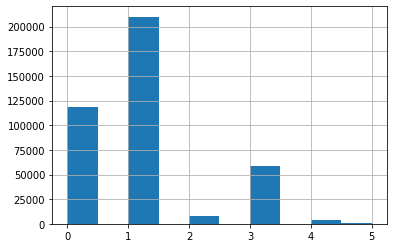

In [ ]:
## 7 - A cor mais presente é a "1" e a com menor ocorrência é a 5;
df['TP_COR_RACA'].hist()

In [ ]:
df['TP_COR_RACA'].describe()

count    399428.000000
mean          1.052650
std           1.005296
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: TP_COR_RACA, dtype: float64

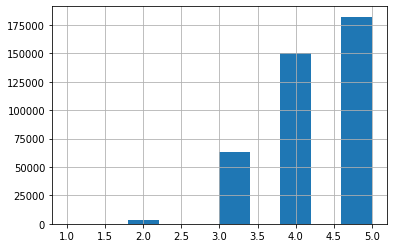

In [ ]:
df['TP_ESCOLARIDADE'].hist()

In [ ]:
## 8 - A maior ocorrência de escolaridade é a 5;
## 9 - A menor é a de 1;


df['TP_ESCOLARIDADE'].describe()

count    399428.000000
mean          4.280571
std           0.756229
min           1.000000
25%           4.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: TP_ESCOLARIDADE, dtype: float64

## 4 - Medidade Dispersão

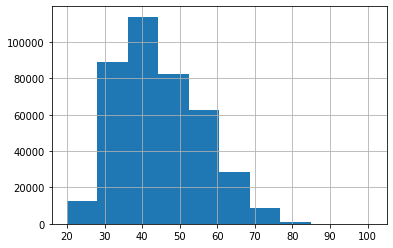

In [ ]:
df['NU_IDADE'].hist()

In [ ]:
df['NU_IDADE'].describe()

count    399428.000000
mean         44.858067
std          10.938593
min          20.000000
25%          36.000000
50%          43.000000
75%          53.000000
max         101.000000
Name: NU_IDADE, dtype: float64

In [ ]:
df['NU_IDADE'].max() - df['NU_IDADE'].min()

81

In [ ]:
df['NU_IDADE'].median()

43.0

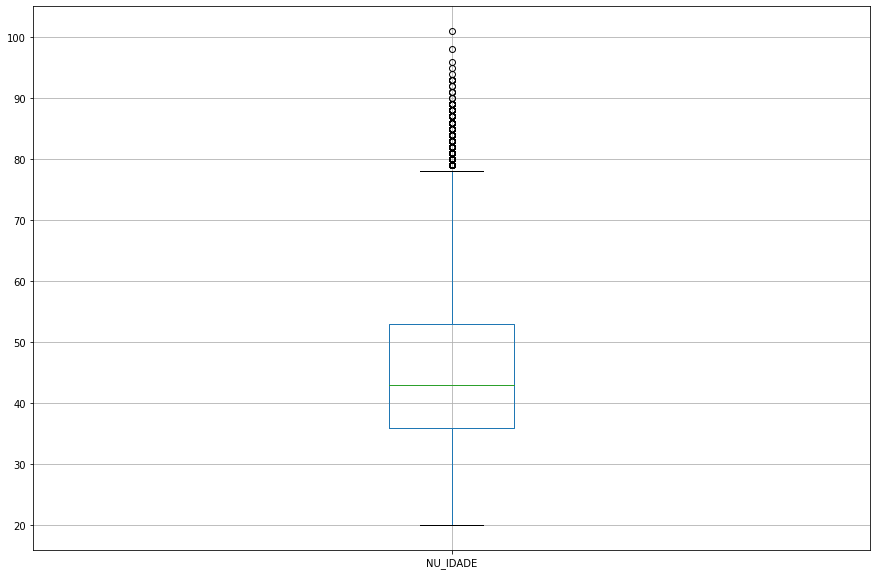

In [ ]:
#Diagrama de caixa
idade = df.filter(items=['NU_IDADE'])
idade.boxplot(figsize=(15,10))

## 5 - Medidas de Correlção

In [ ]:
df.corr()

,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,TP_SITUACAO,TP_ESCOLARIDADE,TP_REGIME_TRABALHO,TP_SEXO,NU_ANO_NASCIMENTO,NU_MES_NASCIMENTO,NU_DIA_NASCIMENTO,NU_IDADE,TP_COR_RACA,CO_PAIS_ORIGEM,TP_NACIONALIDADE,CO_UF_NASCIMENTO,CO_MUNICIPIO_NASCIMENTO,IN_BOLSA_PESQUISA,IN_SUBSTITUTO
CO_IES,1.000000,0.062647,0.350509,-0.013870,-0.126367,0.138256,0.003848,0.122622,-0.001330,-0.002014,-0.122622,0.091832,-0.014237,-0.021873,-0.002400,-0.031255,-0.036313,-0.017297
TP_CATEGORIA_ADMINISTRATIVA,0.062647,1.000000,0.216197,-0.049843,-0.315574,0.699602,-0.024974,0.018047,-0.000115,-0.003201,-0.018047,0.116322,-0.038532,-0.055508,-0.166409,0.046360,-0.083255,-0.191521
TP_ORGANIZACAO_ACADEMICA,0.350509,0.216197,1.000000,-0.026003,-0.250197,0.233447,0.023448,0.164144,-0.004232,-0.003357,-0.164144,0.130142,-0.041199,-0.059875,-0.044724,-0.068607,-0.078858,-0.067855
TP_SITUACAO,-0.013870,-0.049843,-0.026003,1.000000,-0.024952,NaN,-0.008843,-0.025486,-0.000879,0.001000,0.025486,-0.018701,0.007194,0.011342,-0.004265,0.000949,-0.036991,-0.037756
TP_ESCOLARIDADE,-0.126367,-0.315574,-0.250197,-0.024952,1.000000,-0.447495,-0.018866,-0.166204,-0.000455,-0.002492,0.166204,-0.101609,0.052730,0.075714,0.068871,0.029978,0.156958,-0.132983
TP_REGIME_TRABALHO,0.138256,0.699602,0.233447,NaN,-0.447495,1.000000,-0.004215,0.103114,0.001551,-0.003280,-0.103114,0.093347,-0.046622,-0.065081,-0.125032,0.024137,-0.152698,0.030169
TP_SEXO,0.003848,-0.024974,0.023448,-0.008843,-0.018866,-0.004215,1.000000,-0.077553,0.000003,-0.003889,0.077553,0.007436,0.029378,0.040798,-0.004657,0.000399,0.017913,-0.033805
NU_ANO_NASCIMENTO,0.122622,0.018047,0.164144,-0.025486,-0.166204,0.103114,-0.077553,1.000000,-0.025794,0.000504,-1.000000,0.065461,-0.043151,-0.065553,0.064581,-0.011034,-0.055377,0.192240
NU_MES_NASCIMENTO,-0.001330,-0.000115,-0.004232,-0.000879,-0.000455,0.001551,0.000003,-0.025794,1.000000,0.005839,0.025794,-0.001047,0.001326,0.001919,-0.003983,0.000495,0.000795,0.001836
NU_DIA_NASCIMENTO,-0.002014,-0.003201,-0.003357,0.001000,-0.002492,-0.003280,-0.003889,0.000504,0.005839,1.000000,-0.000504,0.000150,0.000200,-0.002024,-0.002449,-0.003456,-0.002979,0.001177


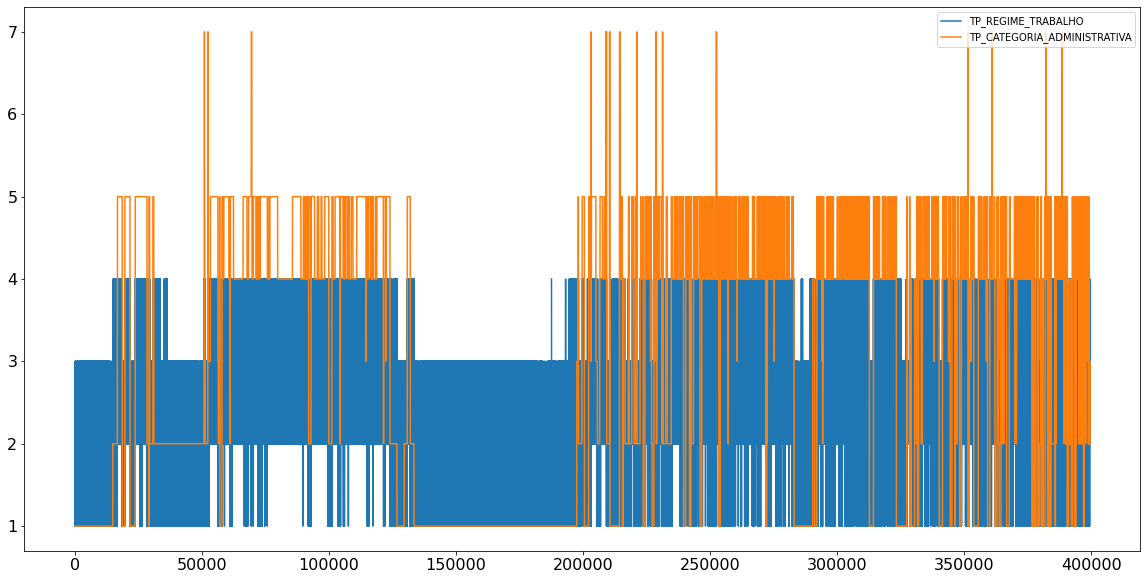

In [ ]:
ax = df.filter(items=['TP_REGIME_TRABALHO','TP_CATEGORIA_ADMINISTRATIVA']).plot(figsize=(20,10), fontsize=16)

##Afirmações

Parte das afirmações já foram feitas acimas, aqui será uma continuação.

In [ ]:
#A mediana dos cargos administrativos dos docentes: 
print('Mulheres: ' + str(df.loc[df['TP_SEXO'] == 2].TP_CATEGORIA_ADMINISTRATIVA.median()) + 
      ', Homens: ' + str(df.loc[df['TP_SEXO'] == 1].TP_CATEGORIA_ADMINISTRATIVA.median()))

Mulheres: 4.0, Homens: 4.0


In [ ]:
#A média dos cargos administrativos dos docentes: 
print('Mulheres: ' + str(df.loc[df['TP_SEXO'] == 2].TP_CATEGORIA_ADMINISTRATIVA.mean()) + 
      ', Homens: ' + str(df.loc[df['TP_SEXO'] == 1].TP_CATEGORIA_ADMINISTRATIVA.mean()))

Mulheres: 3.0027890919694844, Homens: 3.0863211536608604


In [ ]:
df['TP_ESCOLARIDADE'].describe()

count    399428.000000
mean          4.280571
std           0.756229
min           1.000000
25%           4.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: TP_ESCOLARIDADE, dtype: float64

In [ ]:
#Os regimes escolares apresentados para cada tipo de escolaridade (média):
print('1 - ' + str(df.loc[df['TP_ESCOLARIDADE'] == 1].TP_REGIME_TRABALHO.mean()) + 
      ', 2 - ' + str(df.loc[df['TP_ESCOLARIDADE'] == 2].TP_REGIME_TRABALHO.mean()) +
      ', 3 - ' + str(df.loc[df['TP_ESCOLARIDADE'] == 3].TP_REGIME_TRABALHO.mean()) +
      ', 4 - ' + str(df.loc[df['TP_ESCOLARIDADE'] == 4].TP_REGIME_TRABALHO.mean()) +
      ', 5 - ' + str(df.loc[df['TP_ESCOLARIDADE'] == 5].TP_REGIME_TRABALHO.mean()))

1 - 2.5384615384615383, 2 - 2.3380281690140845, 3 - 3.047503707365299, 4 - 2.663286718113671, 5 - 1.7449002073247202


In [ ]:
#A correlação entre a tipo de escolaridade com o tipo de organização acadêmica é muito baixa:
df['TP_ESCOLARIDADE'].corr(df.TP_ORGANIZACAO_ACADEMICA)

-0.2501969005461716

In [ ]:
#A correlação é forte entre o tipo regime de trabalho com o tipo de categoria administrativa:
df['TP_REGIME_TRABALHO'].corr(df.TP_CATEGORIA_ADMINISTRATIVA)

0.6996023241891781